In [ ]:
import pandas as pd

# Load the LLM results
deepseek_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/result_csv/deepseek-R1_results_evaluation_table_llm_judge_results.csv')
gpt41_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/result_csv/gpt-4.1_results_evaluation_table_llm_judge_results.csv')
gpt4o_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/result_csv/gpt-4o-mini_results_evaluation_table_llm_judge_results.csv')
llama_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/result_csv/llama3.3-70B_results_evaluation_table_llm_judge_results.csv')
qwen_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/result_csv/qwen3-235B_results_evaluation_table_llm_judge_results.csv')

# Load your target file (e.g., human_judge.csv)
ds_target_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/raw_csv/human_judge/human_judge_deepseek.csv')
gpt41_target_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/raw_csv/human_judge/human_judge_gpt-4.1.csv')
llama_target_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/raw_csv/human_judge/human_judge_llama3.3-70B.csv')
qwen_target_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/raw_csv/human_judge/human_judge_qwen3-235B.csv')
gpt4o_target_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/raw_csv/human_judge/human_judge_gpt-4o-mini.csv')
# 
# Merge on paper_id and equation_id
selected_ds_df = ds_target_df.merge(
    deepseek_df,
    on=['paper_id', 'equation_id'],
    how='left',  # or 'inner' if you only want matches
    suffixes=('', '_llm')
)

selected_gpt41_df = gpt41_target_df.merge(
    gpt41_df,
    on=['paper_id', 'equation_id'],
    how='left',  # or 'inner' if you only want matches
    suffixes=('', '_llm')
)

selected_gpt4o_df = gpt4o_target_df.merge(
    gpt4o_df,
    on=['paper_id', 'equation_id'],
    how='left',  # or 'inner' if you only want matches
    suffixes=('', '_llm')
)

selected_llama_df = llama_target_df.merge(
    llama_df,
    on=['paper_id', 'equation_id'],
    how='left',  # or 'inner' if you only want matches
    suffixes=('', '_llm')
)

selected_qwen_df = qwen_target_df.merge(
    qwen_df,
    on=['paper_id', 'equation_id'],
    how='left',  # or 'inner' if you only want matches
    suffixes=('', '_llm')
)

In [ ]:
import pandas as pd

model_names = ['deepseek', 'gpt-4.1', 'gpt-4o-mini', 'llama3.3', 'qwen3']  # replace with your actual model names
human_dfs = {}

for model in model_names:
    path = f'D:/0_Master_Thesis/math_agent/Evaluation/data/result_csv/human_judge/human_judge_{model}_results.csv'
    human_dfs[model] = pd.read_csv(path)

In [40]:
score_columns = ['semantic_score', 'reasoning_score', 'completeness_score', 'syntactic_score', 'contextual_score']

# Collect means for each model
means_dict = {}
for model, df in human_dfs.items():
    means_dict[model] = df[score_columns].mean()

# Convert to DataFrame and transpose for better readability
means_df = pd.DataFrame(means_dict).T  # .T transposes so models are rows

# Display the DataFrame
print(means_df)
# # Or, in a Jupyter notebook, just:
# means_df

             semantic_score  reasoning_score  completeness_score  \
deepseek               3.75             4.42                4.96   
gpt-4.1                3.49             4.18                4.98   
gpt-4o-mini            2.65             3.37                4.13   
llama3.3               2.77             3.71                4.53   
qwen3                  3.06             3.85                4.48   

             syntactic_score  contextual_score  
deepseek                4.98              4.92  
gpt-4.1                 4.99              4.86  
gpt-4o-mini             4.83              4.38  
llama3.3                4.91              4.74  
qwen3                   4.75              4.57  


In [27]:
# human_df = pd.read_csv('D:/0_Master_Thesis/math_agent/Evaluation/data/result_csv/human_judge_deepseek_results.csv')
# score_columns = ['semantic_score', 'reasoning_score', 'completeness_score', 'syntactic_score', 'contextual_score',]
# print(human_df[score_columns].describe())


       semantic_score  reasoning_score  completeness_score  syntactic_score  \
count       100.00000       100.000000          100.000000       100.000000   
mean          3.75000         4.420000            4.960000         4.980000   
std           1.32859         0.793662            0.242878         0.140705   
min           1.00000         2.000000            3.000000         4.000000   
25%           2.00000         4.000000            5.000000         5.000000   
50%           4.00000         5.000000            5.000000         5.000000   
75%           5.00000         5.000000            5.000000         5.000000   
max           5.00000         5.000000            5.000000         5.000000   

       contextual_score  
count        100.000000  
mean           4.920000  
std            0.418752  
min            2.000000  
25%            5.000000  
50%            5.000000  
75%            5.000000  
max            5.000000  


In [34]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import pandas as pd
score_columns = ['semantic_score', 'reasoning_score', 'completeness_score', 'syntactic_score', 'contextual_score']
model_dfs = {
    'deepseek': selected_ds_df,
    'gpt-4.1': selected_gpt41_df,
    'gpt-4o-mini': selected_gpt4o_df,
    'llama3.3': selected_llama_df,
    'qwen3': selected_qwen_df,
}

from scipy.stats import spearmanr, kendalltau

results = {}

for model_name, model_df in model_dfs.items():
    results[model_name] = {}
    for score in score_columns:
        llm_scores = model_df[score]
        human_scores = human_dfs[model_name][score]

        spearman_corr, _ = spearmanr(llm_scores, human_scores)
        kendall_corr, _ = kendalltau(llm_scores, human_scores)
        results[model_name][score] = {

            'spearman': spearman_corr,
            'kendalltau': kendall_corr
        }



# Flatten the `results` dictionary into rows
rows = []
for model_name, scores in results.items():
    for score_name, corr_vals in scores.items():
        rows.append({
            'Model': model_name,
            'Dimension': score_name,
            'Spearman': corr_vals['spearman'],
            'Kendalltau': corr_vals['kendalltau']
        })

df = pd.DataFrame(rows)
print(df.to_string())  # Optional: print full table without truncation


          Model           Dimension  Spearman  Kendalltau
0      deepseek      semantic_score  0.587960    0.521596
1      deepseek     reasoning_score  0.347479    0.313343
2      deepseek  completeness_score  0.072154    0.070481
3      deepseek     syntactic_score  0.150536    0.148710
4      deepseek    contextual_score -0.020510   -0.020383
5       gpt-4.1      semantic_score -0.133055   -0.107084
6       gpt-4.1     reasoning_score -0.046766   -0.041686
7       gpt-4.1  completeness_score  0.090806    0.089188
8       gpt-4.1     syntactic_score -0.045403   -0.045009
9       gpt-4.1    contextual_score -0.048205   -0.047422
10  gpt-4o-mini      semantic_score  0.012509    0.010219
11  gpt-4o-mini     reasoning_score  0.049090    0.040182
12  gpt-4o-mini  completeness_score -0.061964   -0.055955
13  gpt-4o-mini     syntactic_score -0.127681   -0.125452
14  gpt-4o-mini    contextual_score  0.058002    0.054344
15     llama3.3      semantic_score  0.036349    0.031622
16     llama3.

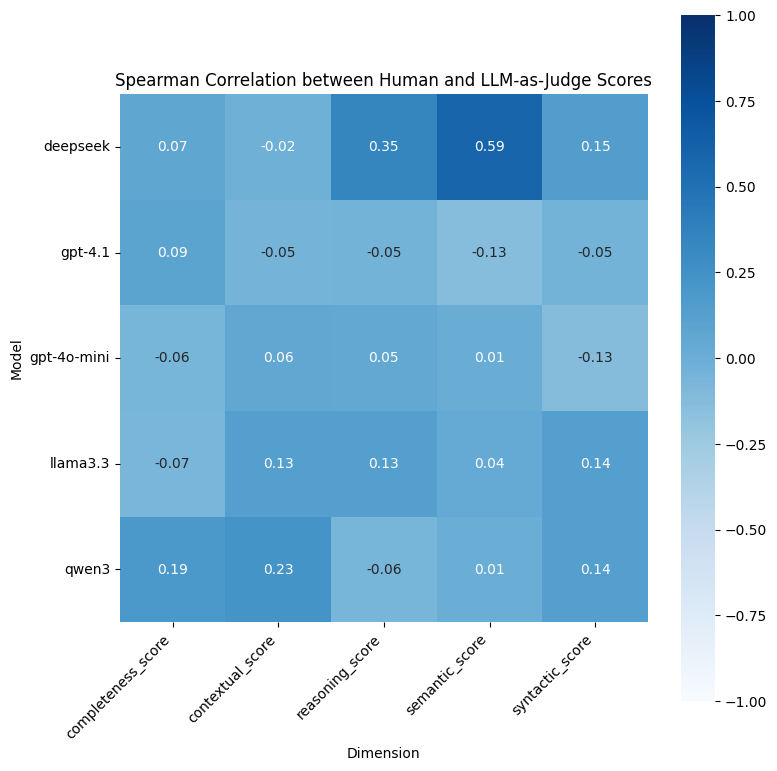

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_data = df.pivot(index='Model', columns='Dimension', values='Spearman')

plt.figure(figsize=(8, 8))  # Make it square
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="Blues",  # Change to a blue color palette
    vmin=-1,
    vmax=1,
    square=True,  # Make cells square
    cbar=True
)

plt.title("Spearman Correlation between Human and LLM-as-Judge Scores")
plt.xlabel("Dimension")
plt.ylabel("Model")

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

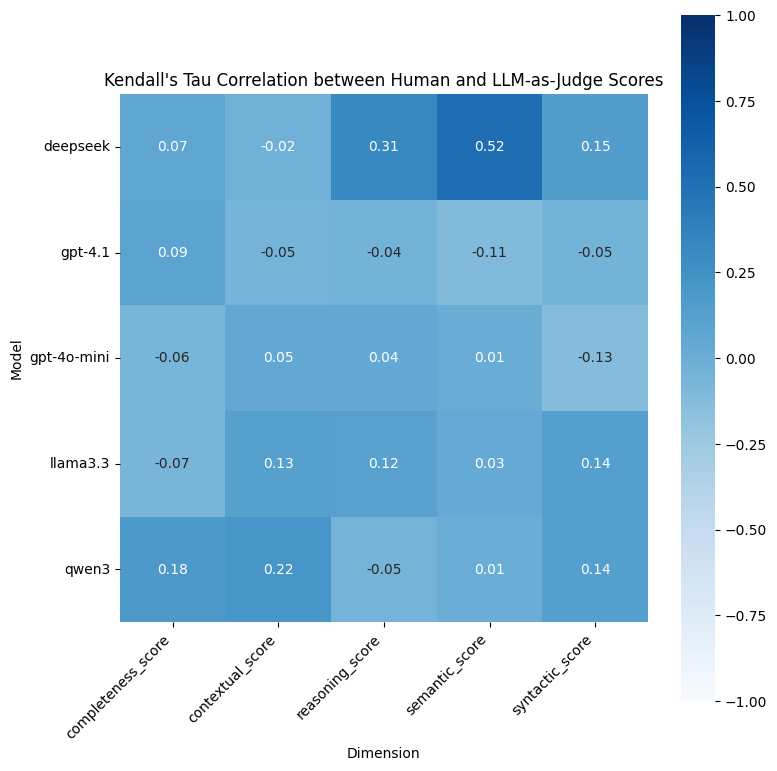

In [36]:
heatmap_data_kendall = df.pivot(index='Model', columns='Dimension', values='Kendalltau')

plt.figure(figsize=(8, 8))  # Make it square
sns.heatmap(
    heatmap_data_kendall,
    annot=True,
    fmt=".2f",
    cmap="Blues",  # Change to a blue color palette
    vmin=-1,
    vmax=1,
    square=True,  # Make cells square
    cbar=True
)

plt.title("Kendall's Tau Correlation between Human and LLM-as-Judge Scores")
plt.xlabel("Dimension")
plt.ylabel("Model")

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


In [37]:
from sklearn.metrics import cohen_kappa_score

kappa_results = {}

for model_name, model_df in model_dfs.items():
    kappa_results[model_name] = {}
    for score in score_columns:
        llm_scores = model_df[score]
        human_scores = human_dfs[model_name][score]
        kappa = cohen_kappa_score(llm_scores, human_scores)
        kappa_results[model_name][score] = kappa


kappa_summary = []
for model_name, scores in kappa_results.items():
    for score, kappa in scores.items():
        kappa_summary.append({'model': model_name, 'score': score, 'kappa': kappa})

kappa_df = pd.DataFrame(kappa_summary)
print(kappa_df)

          model               score     kappa
0      deepseek      semantic_score  0.156765
1      deepseek     reasoning_score  0.091139
2      deepseek  completeness_score  0.020501
3      deepseek     syntactic_score  0.105915
4      deepseek    contextual_score -0.012146
5       gpt-4.1      semantic_score -0.175812
6       gpt-4.1     reasoning_score -0.050070
7       gpt-4.1  completeness_score  0.009312
8       gpt-4.1     syntactic_score -0.018100
9       gpt-4.1    contextual_score -0.026694
10  gpt-4o-mini      semantic_score -0.036963
11  gpt-4o-mini     reasoning_score -0.031628
12  gpt-4o-mini  completeness_score -0.056134
13  gpt-4o-mini     syntactic_score -0.087579
14  gpt-4o-mini    contextual_score  0.012908
15     llama3.3      semantic_score -0.005815
16     llama3.3     reasoning_score  0.049881
17     llama3.3  completeness_score -0.029851
18     llama3.3     syntactic_score  0.095568
19     llama3.3    contextual_score  0.094112
20        qwen3      semantic_scor

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13516\2605760503.py:11: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(


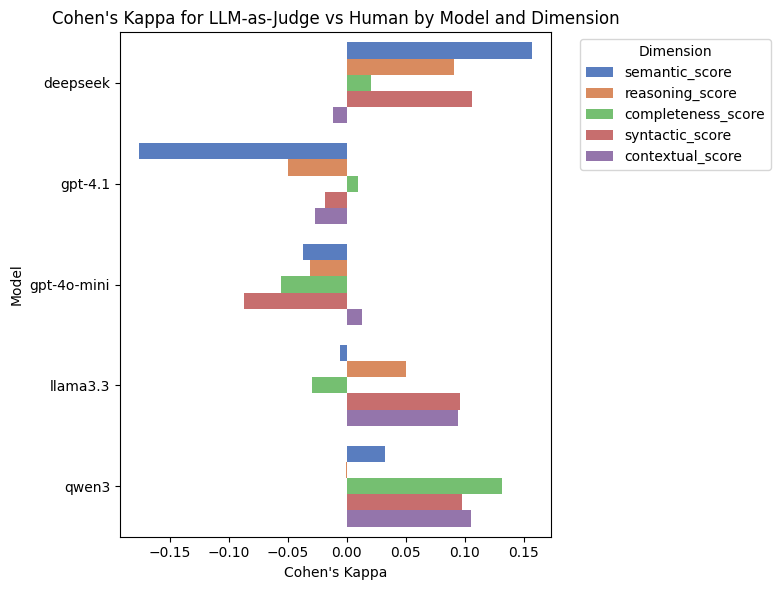

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume kappa_df is your DataFrame with columns: 'model', 'score', 'kappa'

plt.figure(figsize=(8, 6))

# Use a muted color palette for less saturation
palette = sns.color_palette("muted")

sns.barplot(
    data=kappa_df,
    x='kappa',
    y='model',
    hue='score',
    palette=palette,
    orient='h'
)

plt.title("Cohen's Kappa for LLM-as-Judge vs Human by Model and Dimension")
plt.xlabel("Cohen's Kappa")
plt.ylabel("Model")
plt.legend(title="Dimension", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
